../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv : Number of erroneous rows:  2
../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv 102    ../data/mzn-challenge/2024/yumi-dynamic/p_4_GG...
146    ../data/mzn-challenge/2024/yumi-dynamic/p_5_GG...
Name: data_file, dtype: object
../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv: 5 failed experiments using turbo.gpu.release have been removed (the faulty experiments have been stored in failed_turbo.gpu.release-v1.2.8-mzn2024.csv).


/home/ptalbot/repositories/lattice-land/bench/benchmarks/analyzing/analysis.py:203: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


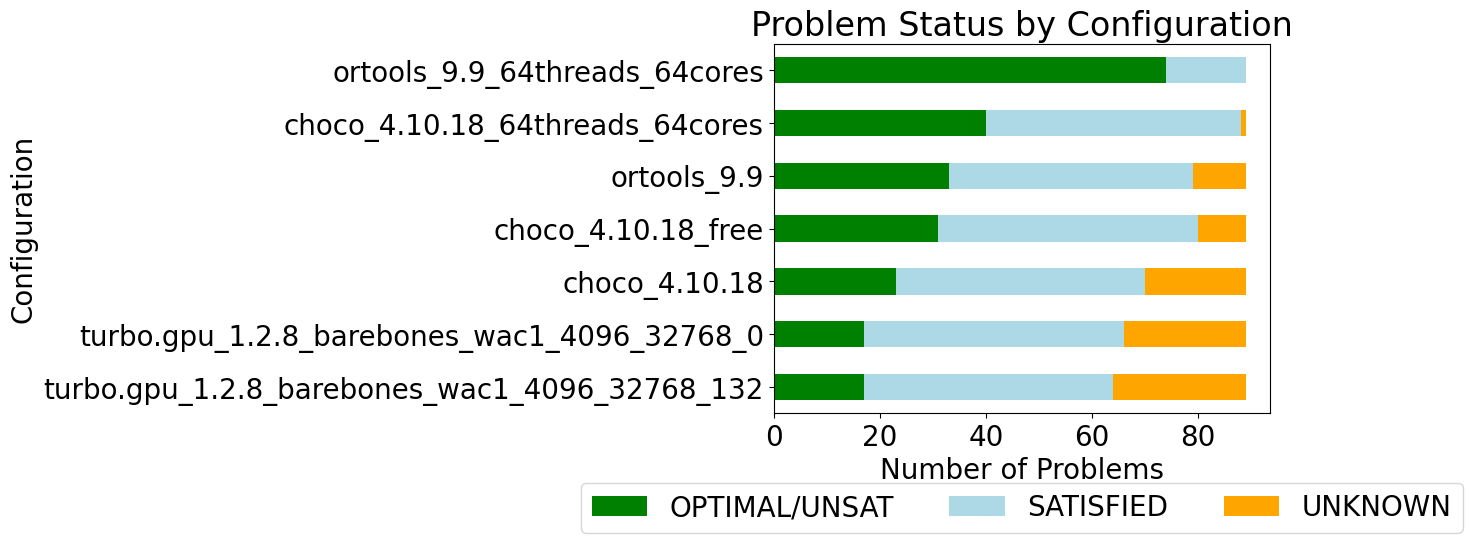

,uid,version,machine,short_uid,avg_nodes_per_second,median_nodes_per_second,avg_normalized_nodes_per_second,best_nodes_per_second,avg_fp_iterations_per_second,median_fp_iterations_per_second,avg_normalized_fp_iterations_per_second,best_fp_iterations_per_second,avg_fp_iterations,median_fp_iterations,avg_normalized_fp_iterations,best_fp_iterations,avg_propagator_mem_mb,median_propagator_mem_mb,avg_normalized_propagator_mem_mb,best_propagator_mem_mb,avg_store_mem_kb,avg_normalized_store_mem_kb,best_store_mem_kb,median_store_mem_kb,problem_optimal,problem_sat,problem_unknown,problem_with_store_shared,problem_with_props_shared,idle_eps_workers
5,turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0,1.2.8,helios,turbo.gpu_1.2.8_barebones_wac1_4096_32768_0,376835.513678,105678.818614,0.0,0,4.745171e+06,1.180322e+06,0.0,0,20.638252,12.443383,0.0,89,1.151688,0.255024,0.0,89,412.284135,0.0,89,118.008,17,49,23,18,0,19.0
6,turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_132,1.2.8,helios,turbo.gpu_1.2.8_barebones_wac1_4096_32768_132,133748.793273,57790.076081,0.0,0,1.758488e+06,7.828546e+05,0.0,0,20.932821,12.463302,0.0,89,1.151688,0.255024,0.0,89,412.284135,0.0,89,118.008,17,47,25,25,0,13.0
2,org.choco.choco_4.10.18_aion_1200s,4.10.18,aion,choco_4.10.18,33238.699528,11461.656900,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,89,0.000000,0.000000,0.0,89,0.000000,0.0,89,0.000,23,47,19,0,0,0.0
0,com.google.ortools.sat_9.9_aion_1200s,9.9,aion,ortools_9.9,12292.494292,5663.017703,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,89,0.000000,0.000000,0.0,89,0.000000,0.0,89,0.000,33,46,10,0,0,0.0
4,org.choco.choco_4.10.18_aion_1200s_free,4.10.18,aion,choco_4.10.18_free,3909.281476,1627.906003,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,89,0.000000,0.000000,0.0,89,0.000000,0.0,89,0.000,31,49,9,0,0,0.0
3,org.choco.choco_4.10.18_aion_1200s_64threads_64cores,4.10.18,aion,choco_4.10.18_64threads_64cores,3837.193191,1125.094349,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,89,0.000000,0.000000,0.0,89,0.000000,0.0,89,0.000,40,48,1,0,0,0.0
1,com.google.ortools.sat_9.9_aion_1200s_64threads_64cores,9.9,aion,ortools_9.9_64threads_64cores,220.246801,7.976832,0.0,0,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,89,0.000000,0.000000,0.0,89,0.000000,0.0,89,0.000,74,15,0,0,0,0.0


| short_uid                                     |   avg_nodes_per_second |   problem_optimal |   problem_sat |   problem_unknown |
|:----------------------------------------------|-----------------------:|------------------:|--------------:|------------------:|
| ortools_9.9_64threads_64cores                 |                220.247 |                74 |            15 |                 0 |
| choco_4.10.18_64threads_64cores               |               3837.19  |                40 |            48 |                 1 |
| ortools_9.9                                   |              12292.5   |                33 |            46 |                10 |
| choco_4.10.18_free                            |               3909.28  |                31 |            49 |                 9 |
| choco_4.10.18                                 |              33238.7   |                23 |            47 |                19 |
| turbo.gpu_1.2.8_barebones_wac1_4096_32768_0   |             376836     |         

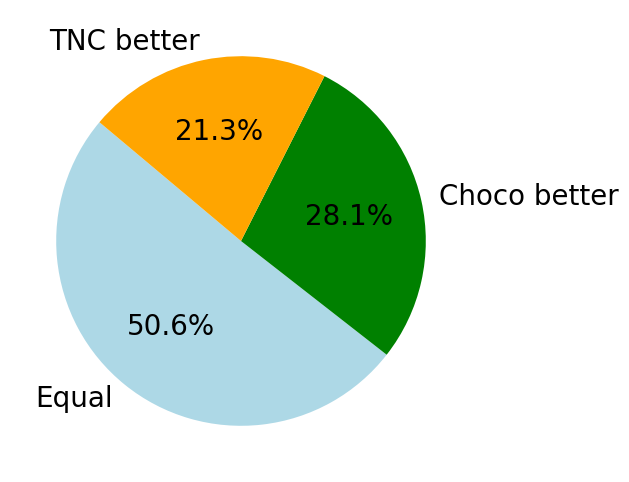

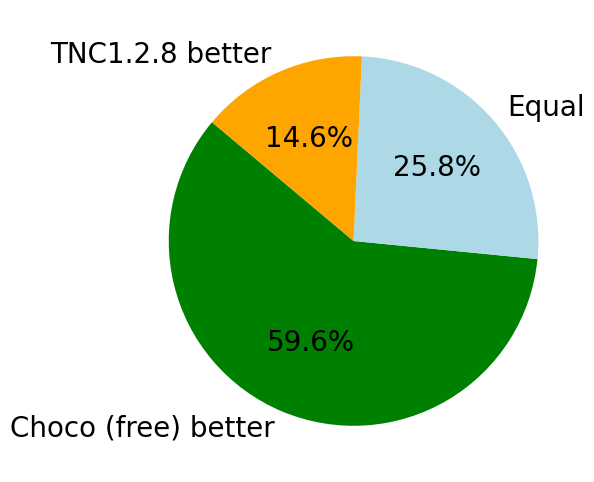

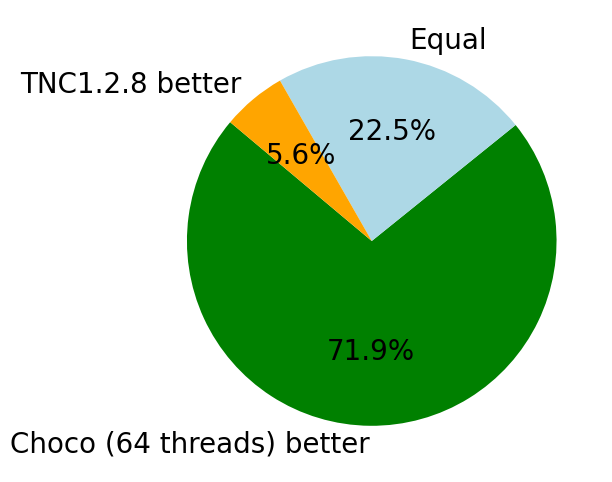

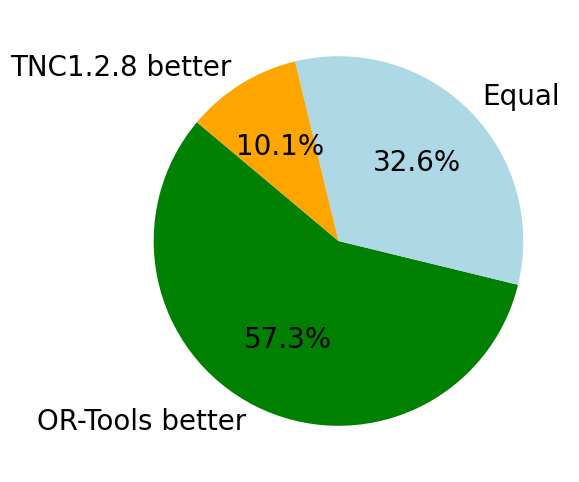

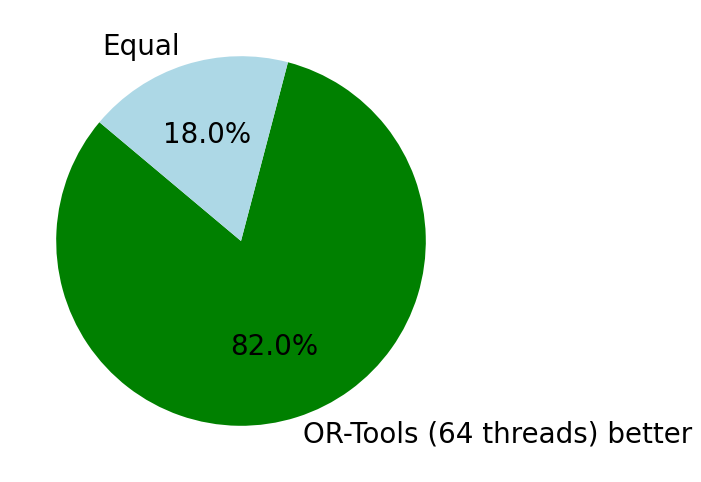

In [13]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/precision5820/com.google.ortools.sat-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat.noglobal-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat-v9.9-par.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.1.7-A5000.csv",
  # "../campaign/precision5820/turbo.cpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.1.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.6.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.7-mzn2024.csv",
  "../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv",
  "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv",
  "../campaign/aion/com.google.ortools.sat-v9.9.csv"
  # "../campaign/iris/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision7750/turbo.cpu.release-v1.2.6-analysis.csv"
  # "../campaign/aion/turbo.cpu.release-v1.2.7-mzn2024-analysis.csv"
  # "../campaign/precision7750/turbo.gpu.release-v1.2.7.csv"
  # "../campaign/precision5820/turbo.cpu.release-v1.2.4.csv"
])

# df.to_csv("test.csv", index=False)
# df = df[~(df['problem'] == "rcpsp")]
# df = df[df['problem'] == "rcpsp"]

# Because globalmem was only benchmarked on problems that could fit in shared memory.
# But we don't want to remove the others for most of the analysis. (comment the line if you want to analyse the globalmem results)
df = df[df['uid'] != "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64_globalmem"]
# df = df[df['uid'] != "turbo.gpu.release_1.2.7_helios_1200s_hybrid_wac1_4096_32768_132_72"]

# df = df[df['short_uid'] != "turbo.gpu_1.2.7_hybrid_ac1_32768_132_72_disable_simplify_ipc"]
# df = df[df['short_uid'] != "turbo.gpu_1.2.7_hybrid_ac1_32768_132_72_disable_simplify"]
# df = df[df['short_uid'] != "turbo.gpu_1.2.7_hybrid_ac1_32768_132_72_force_ternarize_ipc"]
# df = df[df['uid'] != "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_132"]

mzn_challenge = pd.read_csv("../benchmarking/mzn2024_noset.csv")
mzn_challenge['model_data_file'] = mzn_challenge['model'] + ' - ' + mzn_challenge['data_file']
# print(mzn_challenge)
mzn_data = set(mzn_challenge['model_data_file'])
df = df[df['model_data_file'].isin(mzn_data)]

# Instances that might have been solved during flattening.
# df = df[~(df['preprocessing_time'].isna())]
# analysis.analyse_tnf_per_problem(df)
# analysis.heatmap_operators(df)

df = analysis.intersect(df)

# choco = analysis.read_experiments([
#   "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv"
# ])

# df['choco_vars'] = choco['variables']
# df['choco_cons'] = choco['constraints']

# analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'parsed_variables', 'parsed_constraints')
# analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'tnf_variables', 'tnf_constraints')
# analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons','variables_after_simplification', 'constraints_after_simplification')

# df = df[df['timeout_ms'] == 1200000]

# print(df[df['preprocessing_time'] >= 1200])

# analysis.analyse_tnf_per_problem(df[df['uid'] == "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_128"])

analysis.plot_overall_result(df)
# display(HTML(analysis.metrics_table(df[df['mzn_solver'].str.startswith("turbo")]).to_html()))
metrics = analysis.metrics_table(df)
display(HTML(metrics.to_html()))
# print(metrics[metrics['short_uid'] != "turbo.gpu_1.2.7_hybrid_wac1_4096_32768_264_72"][['short_uid', 'avg_nodes_per_second','median_nodes_per_second','avg_fp_iterations_per_second','median_fp_iterations_per_second', 'avg_propagator_mem_mb', 'median_propagator_mem_mb', 'avg_store_mem_kb', 'median_store_mem_kb', 'problem_with_store_shared', 'problem_with_props_shared']].T.to_latex(index=True))

sorted_metrics = metrics.sort_values(by=['problem_optimal', 'problem_sat', 'avg_nodes_per_second', 'version'], ascending=[False, False, False, True])
print(sorted_metrics[['short_uid','avg_nodes_per_second','problem_optimal', 'problem_sat', 'problem_unknown']].to_markdown(index=False))
# print(sorted_metrics[['short_uid','problem_optimal', 'problem_sat', 'problem_unknown']].to_latex(index=False))

# analysis.plot_time_distribution("hybrid264-wac1-4096-sub15", df[df['uid'] == "turbo.gpu.release_1.2.7_helios_1200s_hybrid_wac1_4096_32768_264_72"])

# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.4_precision5820_300s_hybrid_ac1_4096_128_10", "turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10")

# print(analysis.list_problem_where_leq(df, "nodes", "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_1024"))


p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "org.choco.choco_4.10.18_aion_1200s", "TNC", "Choco")

# print(p[p['Comparison'] == 'Error'])
p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "org.choco.choco_4.10.18_aion_1200s_free", "TNC1.2.8", "Choco (free)")
p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "org.choco.choco_4.10.18_aion_1200s_64threads_64cores", "TNC1.2.8", "Choco (64 threads)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.7_helios_1200s_hybrid_wac1_4096_32768_264_72", "org.choco.choco_4.10.18_aion_1200s_64threads_64cores")
p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "com.google.ortools.sat_9.9_aion_1200s", "TNC1.2.8", "OR-Tools")
p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "com.google.ortools.sat_9.9_aion_1200s_64threads_64cores", "TNC1.2.8", "OR-Tools (64 threads)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_32768_264_72", "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_131072_264_72")
# print(p[p['Comparison'] == 'Error'])
# print(p[p['Comparison'] == 'turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10 better'])
